In [ ]:
## Plan to Develop the Stock Data API Integration Project
Step 1: Create a Python script using the requests library to fetch stock prices from Alpha Vantage API.
Step 2: Store the data in a SQLite database using Python’s sqlite3 module.
Step 3: Test the script locally to ensure data integrity and functionality.

In [2]:
!pip install requests

In [40]:
import sqlite3
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt

In [32]:
# API configs
API_KEY = "KEY Comes here"
SYMBOL = "AAPL"
URL = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={SYMBOL}&apikey={API_KEY}"

In [34]:
# Fetch data from API
response = requests.get(URL)
response.raise_for_status()
data = response.json()

# Check if API returned valid data
if "Time Series (Daily)" not in data:
    raise KeyError("Invalid API response: 'Time Series (Daily)' not found")

prices = data["Time Series (Daily)"]

print(prices)

{'2025-06-10': {'1. open': '200.6000', '2. high': '204.3500', '3. low': '200.5700', '4. close': '202.6700', '5. volume': '54672608'}, '2025-06-09': {'1. open': '204.3900', '2. high': '206.0000', '3. low': '200.0200', '4. close': '201.4500', '5. volume': '72862557'}, '2025-06-06': {'1. open': '203.0000', '2. high': '205.7000', '3. low': '202.0500', '4. close': '203.9200', '5. volume': '46607693'}, '2025-06-05': {'1. open': '203.5000', '2. high': '204.7500', '3. low': '200.1500', '4. close': '200.6300', '5. volume': '55221235'}, '2025-06-04': {'1. open': '202.9100', '2. high': '206.2400', '3. low': '202.1000', '4. close': '202.8200', '5. volume': '43603985'}, '2025-06-03': {'1. open': '201.3500', '2. high': '203.7700', '3. low': '200.9550', '4. close': '203.2700', '5. volume': '46381567'}, '2025-06-02': {'1. open': '200.2800', '2. high': '202.1300', '3. low': '200.1200', '4. close': '201.7000', '5. volume': '35423294'}, '2025-05-30': {'1. open': '199.3700', '2. high': '201.9600', '3. low

In [36]:
# Connect to SQLite database
conn = sqlite3.connect("stock_prices.db")
cursor = conn.cursor()

# Create table if it doesn't exist
cursor.execute("""
    CREATE TABLE IF NOT EXISTS stock_prices ( symbol TEXT, date TEXT, close_price REAL, PRIMARY KEY (symbol, date))
    """)

In [20]:
# Insert data into table
for date, values in prices.items():
    close_price = float(values["4. close"])
    cursor.execute("""
        INSERT OR REPLACE INTO stock_prices (symbol, date, close_price)
        VALUES (?, ?, ?) """, (SYMBOL, date, close_price))

    # Commit changes
conn.commit()

In [22]:
# Verify data insertion
cursor.execute("SELECT * FROM stock_prices WHERE symbol = ? LIMIT 5", (SYMBOL,))
rows = cursor.fetchall()
print("Sample data stored in database:")
for row in rows:
        print(row)

Sample data stored in database:
('AAPL', '2025-01-16', 228.26)
('AAPL', '2025-01-17', 229.98)
('AAPL', '2025-01-21', 222.64)
('AAPL', '2025-01-22', 223.83)
('AAPL', '2025-01-23', 223.66)


In [38]:
# calculating average closing price
cursor.execute("SELECT AVG(close_price) FROM stock_prices WHERE symbol = ?", (SYMBOL,))
avg_price = cursor.fetchone()[0]
print(f"Average closing price for {SYMBOL}: ${avg_price:.2f}")

Average closing price for AAPL: $216.65


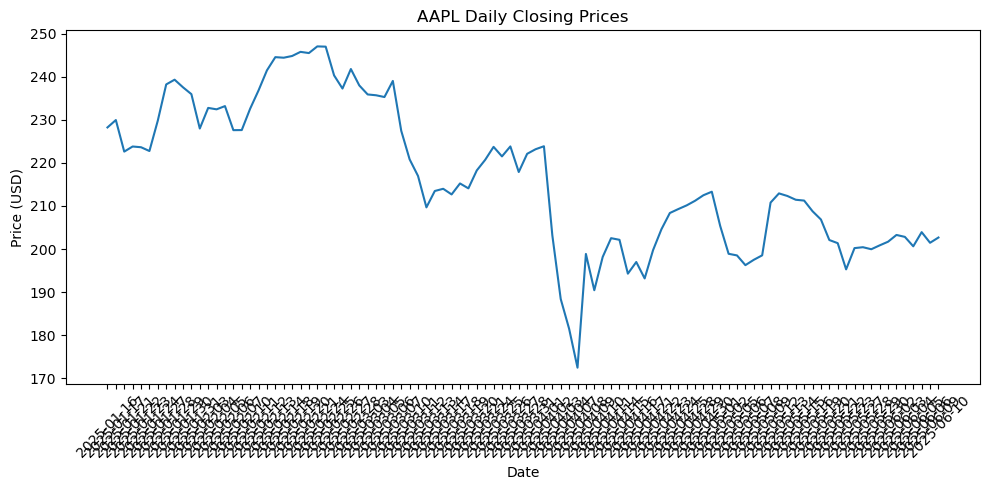

In [52]:
# Plotting prices
cursor.execute("SELECT date, close_price FROM stock_prices WHERE symbol = ? ORDER BY date", (SYMBOL,))
rows = cursor.fetchall()
dates = [row[0] for row in rows]
prices = [row[1] for row in rows]
plt.figure(figsize = (10,5))
plt.plot(dates, prices)
plt.title(f"{SYMBOL} Daily Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Close database connection
if conn:
    conn.close()
    print("Database connection closed.")

Database connection closed.
